# SET UP DATA

In [1]:
import pandas as pd                 # For dataframe handling
import numpy as np                  # For matrix and list computations
import matplotlib.pyplot as plt     # For advanced graphse
import seaborn as sns  # For hi level, Pandas oriented, graphics
import scipy.stats as stats  # For statistical inference 
from pandas.api.types import CategoricalDtype

In [17]:
# loading the dataset to pandas DataFrame
url = 'https://raw.githubusercontent.com/aloa04/tfm/main/data/DATASET_HUTJ.csv'
ds = pd.read_csv(url,sep=';', decimal=',', encoding='latin-1')
ds

,NM_ORGANIZATIONESP,STD_N_HR_TYPEESP,Año,AñoMes,STD_ID_PERSON,STD_N_GENDERESP,Núm. Periodo,SSP_ID_CONT_INTERN,SSP_NM_CONT_INESP,Fecha Inicio,...,STD_N_WL_TYPEESP,STD_WORK_LOCESP,CSP_N_COLECTIVO,STD_DT_BIRTH,Edad,RangoEdad,Nacionalidad,SSP_ID_MINUSVALIA,Nombre de la minusvalia : Span,Activos
0,Hospital de TORREJON,Empleado,2018,201801,1000148,Mujer,2,189,INDEFINIDO TP COMPL TRANSF DE TEMPO,03/05/2010,...,Atención Especializada,HospitalA,Estructura,17/04/1982,41,41-50,Española,-2,Sin Valor,1
1,Hospital de TORREJON,Empleado,2018,201801,1001312,Varón,2,100,ORDINARIO INDEFINIDO TP COMPLETO,04/11/2010,...,Atención Especializada,HospitalA,Estructura,15/08/1966,57,Más de 50,Española,-2,Sin Valor,1
2,Hospital de TORREJON,Empleado,2018,201801,1002094,Varón,2,100,ORDINARIO INDEFINIDO TP COMPLETO,16/05/2011,...,Atención Especializada,HospitalA,Estructura,20/02/1983,40,25-40,Española,-2,Sin Valor,1
3,Hospital de TORREJON,Empleado,2018,201801,1002518,Mujer,2,189,INDEFINIDO TP COMPL TRANSF DE TEMPO,03/10/2011,...,Atención Especializada,HospitalA,Estructura,12/10/1983,40,25-40,Española,-2,Sin Valor,1
4,Hospital de TORREJON,Empleado,2018,201801,1003521,Varón,2,100,ORDINARIO INDEFINIDO TP COMPLETO,27/06/2011,...,Atención Especializada,HospitalA,Estructura,09/07/1966,57,Más de 50,Española,-2,Sin Valor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61104,Hospital de TORREJON,Empleado,2022,202207,1030771,Mujer,1,402R,EVENTUAL (REFUERZO),05/07/2022,...,Atención Especializada,HospitalA,Refuerzos,23/07/1990,33,25-40,Española,-2,Sin Valor,1
61105,Hospital de TORREJON,Empleado,2022,202207,1030772,Mujer,1,402R,EVENTUAL (REFUERZO),08/07/2022,...,Atención Especializada,HospitalA,Refuerzos,22/10/1995,28,25-40,Española,-2,Sin Valor,1
61106,Hospital de TORREJON,Empleado,2022,202207,1030777,Varón,1,402V,EVENTUAL (SUST. VACACIONES),06/07/2022,...,Atención Especializada,HospitalA,Sustituciones,16/06/1981,42,41-50,Española,-2,Sin Valor,1
61107,Hospital de TORREJON,Empleado,2022,202207,1030782,Mujer,1,402R,EVENTUAL (REFUERZO),08/07/2022,...,Atención Especializada,HospitalA,Refuerzos,22/05/1976,47,41-50,Española,-2,Sin Valor,1


## Data Transformation

In [18]:
ds.columns


Index(['NM_ORGANIZATIONESP', 'STD_N_HR_TYPEESP', 'Año', 'AñoMes',
       'STD_ID_PERSON', 'STD_N_GENDERESP', 'Núm. Periodo',
       'SSP_ID_CONT_INTERN', 'SSP_NM_CONT_INESP', 'Fecha Inicio',
       'Fecha_Inicio_contra', 'Fecha_Fin_contra', 'SSP_NO_DEFINIDO',
       'CSP_N_AG_CATEGOR', 'CSP_NM_CATEGORESP', 'STD_N_WU_TYPEESP',
       'STD_N_WL_TYPEESP', 'STD_WORK_LOCESP', 'CSP_N_COLECTIVO',
       'STD_DT_BIRTH', 'Edad', 'RangoEdad', 'Nacionalidad',
       'SSP_ID_MINUSVALIA', 'Nombre de la minusvalia : Span', 'Activos'],
      dtype='object')

In [62]:
ds = ds.rename(columns={'Año':'Anyo', 'AñoMes':'AnyoMes', 'Núm. Periodo':'Num_Periodo'})

In [20]:
ds = ds.drop(ds[ds["STD_N_GENDERESP"]=='Valor no dado de alta en maestro'].index)
ds

,NM_ORGANIZATIONESP,STD_N_HR_TYPEESP,Anyo,AnyoMes,STD_ID_PERSON,STD_N_GENDERESP,Núm. Periodo,SSP_ID_CONT_INTERN,SSP_NM_CONT_INESP,Fecha Inicio,...,STD_N_WL_TYPEESP,STD_WORK_LOCESP,CSP_N_COLECTIVO,STD_DT_BIRTH,Edad,RangoEdad,Nacionalidad,SSP_ID_MINUSVALIA,Nombre de la minusvalia : Span,Activos
0,Hospital de TORREJON,Empleado,2018,201801,1000148,Mujer,2,189,INDEFINIDO TP COMPL TRANSF DE TEMPO,03/05/2010,...,Atención Especializada,HospitalA,Estructura,17/04/1982,41,41-50,Española,-2,Sin Valor,1
1,Hospital de TORREJON,Empleado,2018,201801,1001312,Varón,2,100,ORDINARIO INDEFINIDO TP COMPLETO,04/11/2010,...,Atención Especializada,HospitalA,Estructura,15/08/1966,57,Más de 50,Española,-2,Sin Valor,1
2,Hospital de TORREJON,Empleado,2018,201801,1002094,Varón,2,100,ORDINARIO INDEFINIDO TP COMPLETO,16/05/2011,...,Atención Especializada,HospitalA,Estructura,20/02/1983,40,25-40,Española,-2,Sin Valor,1
3,Hospital de TORREJON,Empleado,2018,201801,1002518,Mujer,2,189,INDEFINIDO TP COMPL TRANSF DE TEMPO,03/10/2011,...,Atención Especializada,HospitalA,Estructura,12/10/1983,40,25-40,Española,-2,Sin Valor,1
4,Hospital de TORREJON,Empleado,2018,201801,1003521,Varón,2,100,ORDINARIO INDEFINIDO TP COMPLETO,27/06/2011,...,Atención Especializada,HospitalA,Estructura,09/07/1966,57,Más de 50,Española,-2,Sin Valor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61104,Hospital de TORREJON,Empleado,2022,202207,1030771,Mujer,1,402R,EVENTUAL (REFUERZO),05/07/2022,...,Atención Especializada,HospitalA,Refuerzos,23/07/1990,33,25-40,Española,-2,Sin Valor,1
61105,Hospital de TORREJON,Empleado,2022,202207,1030772,Mujer,1,402R,EVENTUAL (REFUERZO),08/07/2022,...,Atención Especializada,HospitalA,Refuerzos,22/10/1995,28,25-40,Española,-2,Sin Valor,1
61106,Hospital de TORREJON,Empleado,2022,202207,1030777,Varón,1,402V,EVENTUAL (SUST. VACACIONES),06/07/2022,...,Atención Especializada,HospitalA,Sustituciones,16/06/1981,42,41-50,Española,-2,Sin Valor,1
61107,Hospital de TORREJON,Empleado,2022,202207,1030782,Mujer,1,402R,EVENTUAL (REFUERZO),08/07/2022,...,Atención Especializada,HospitalA,Refuerzos,22/05/1976,47,41-50,Española,-2,Sin Valor,1


# Initial Variable Explorer

Variable target: Activos

Text(0, 0.5, 'Percentage')

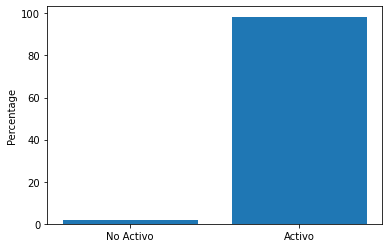

In [21]:
mytable = ds.groupby(['Activos']).size()
n = mytable.sum()
mytable = (mytable/n)*100
barlist = ['No Activo', 'Activo']
plt.bar(barlist, mytable)
plt.ylabel('Percentage')

## Avtivos vs SSP_NO_DEFINIDO

Variable Nominal: SSP_NO_DEFINIDO

Text(0, 0.5, 'Percentage')

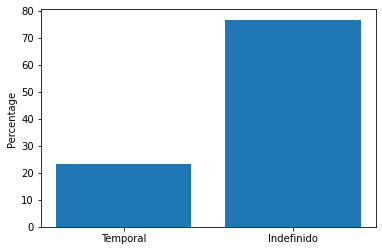

In [22]:
mytable = ds.groupby(['SSP_NO_DEFINIDO']).size()
n = mytable.sum()
mytable = (mytable/n)*100
barlist = ['Temporal', 'Indefinido']
plt.bar(barlist, mytable)
plt.ylabel('Percentage')


<AxesSubplot:>

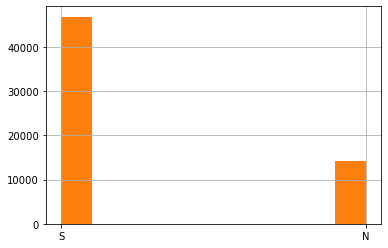

In [23]:
plt.hist(ds.SSP_NO_DEFINIDO)
ds.SSP_NO_DEFINIDO.hist() 

In [24]:
ds.groupby('SSP_NO_DEFINIDO').Activos.mean()

SSP_NO_DEFINIDO
N    0.999228
S    0.979530
Name: Activos, dtype: float64

In [25]:
pd.crosstab(ds.Activos, ds.SSP_NO_DEFINIDO, margins=True) #1º la VD  target, 2º La predicción


SSP_NO_DEFINIDO,N,S,All
Activos,,,
0,11,959,970
1,14245,45889,60134
All,14256,46848,61104


In [26]:
pd.crosstab(ds.Activos, ds.SSP_NO_DEFINIDO,normalize='columns', margins=True)*100    #Para que nos de en porcentajes


SSP_NO_DEFINIDO,N,S,All
Activos,,,
0,0.07716,2.047046,1.587457
1,99.92284,97.952954,98.412543


In [27]:
my_ct = pd.crosstab(ds.Activos, ds.SSP_NO_DEFINIDO,normalize='columns', margins=True)*100  


In [28]:
my_ct=round(my_ct,1)
print(my_ct)


SSP_NO_DEFINIDO     N     S   All
Activos                          
0                 0.1   2.0   1.6
1                99.9  98.0  98.4


In [29]:
#Stadistical test
ct = pd.crosstab(ds.Activos, ds.SSP_NO_DEFINIDO)
ct

SSP_NO_DEFINIDO,N,S
Activos,,
0,11,959
1,14245,45889


In [30]:
stats.chi2_contingency(ct)

(270.2271557599875,
 1.0125155947699297e-60,
 1,
 array([[  226.30793401,   743.69206599],
        [14029.69206599, 46104.30793401]]))

pvalue = 0.000

In [31]:
#Ploting the cross tabulation
my_ct2=my_ct.transpose()

(array([0, 1, 2]), [Text(0, 0, 'N'), Text(1, 0, 'S'), Text(2, 0, 'All')])

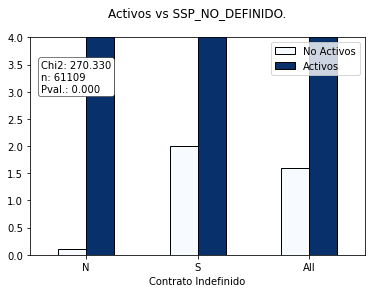

In [32]:
my_ct2.plot(kind="bar", edgecolor = "black", colormap='Blues') #Mapas de colores https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(-0.4, 3, 'Chi2: 270.330''\n''n: 61109' '\n' 'Pval.: 0.000', bbox=props)
plt.xlabel('Contrato Indefinido')
plt.title('Activos vs SSP_NO_DEFINIDO.''\n')
plt.legend(['No Activos','Activos'])
plt.ylim(0,4)
plt.xticks(rotation='horizontal')

## Activos vs CSP_N_AG_CATEGOR'

Variable Nominal: CSP_N_AG_CATEGOR

Text(0, 0.5, 'Percentage')

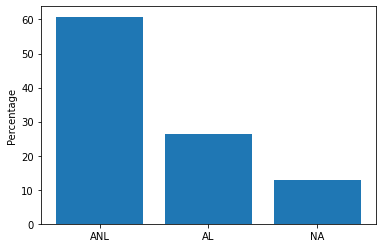

In [33]:
mytable = ds.groupby(['CSP_N_AG_CATEGOR']).size()
n = mytable.sum()
mytable = (mytable/n)*100
barlist = ['ANL', 'AL', 'NA']
plt.bar(barlist, mytable)
plt.ylabel('Percentage')

In [34]:
ds.groupby('CSP_N_AG_CATEGOR').Activos.mean()

CSP_N_AG_CATEGOR
Asistenciales No Licenciados    0.983555
Asistenciales licenciados       0.981238
No Asistenciales                0.992821
Name: Activos, dtype: float64

In [35]:
pd.crosstab(ds.Activos, ds.CSP_N_AG_CATEGOR, margins=True) #1º la VD  target, 2º La predicción


CSP_N_AG_CATEGOR,Asistenciales No Licenciados,Asistenciales licenciados,No Asistenciales,All
Activos,,,,
0,611,303,56,970
1,36543,15847,7744,60134
All,37154,16150,7800,61104


In [36]:
pd.crosstab(ds.Activos, ds.CSP_N_AG_CATEGOR,normalize='columns', margins=True)*100    #Para que nos de en porcentajes


CSP_N_AG_CATEGOR,Asistenciales No Licenciados,Asistenciales licenciados,No Asistenciales,All
Activos,,,,
0,1.644507,1.876161,0.717949,1.587457
1,98.355493,98.123839,99.282051,98.412543


In [37]:
my_ct = pd.crosstab(ds.Activos, ds.CSP_N_AG_CATEGOR,normalize='columns', margins=True)*100  


In [38]:
my_ct=round(my_ct,1)


In [39]:
print(my_ct)


CSP_N_AG_CATEGOR  Asistenciales No Licenciados  Asistenciales licenciados  \
Activos                                                                     
0                                          1.6                        1.9   
1                                         98.4                       98.1   

CSP_N_AG_CATEGOR  No Asistenciales   All  
Activos                                   
0                              0.7   1.6  
1                             99.3  98.4  


In [40]:
#Stadistical test
ct = pd.crosstab(ds.Activos, ds.CSP_N_AG_CATEGOR)
ct

CSP_N_AG_CATEGOR,Asistenciales No Licenciados,Asistenciales licenciados,No Asistenciales
Activos,,,
0,611,303,56
1,36543,15847,7744


In [41]:
stats.chi2_contingency(ct)


(47.138040024605175,
 5.809043983715923e-11,
 2,
 array([[  589.80394082,   256.37437811,   123.82168107],
        [36564.19605918, 15893.62562189,  7676.17831893]]))

In [42]:
#Ploting the cross tabulation
my_ct2=my_ct.transpose() #Primero hay que treansponer la tabla para poder representarla graficamente


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Asistenciales No Licenciados'),
  Text(1, 0, 'Asistenciales licenciados'),
  Text(2, 0, 'No Asistenciales'),
  Text(3, 0, 'All')])

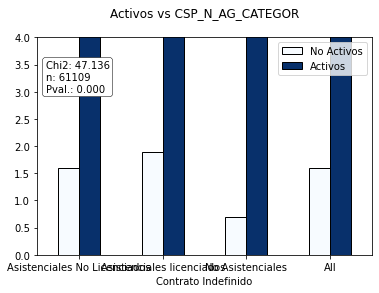

In [43]:
my_ct2.plot(kind="bar", edgecolor = "black", colormap='Blues') #Mapas de colores https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(-0.4, 3, 'Chi2: 47.136''\n''n: 61109' '\n' 'Pval.: 0.000', bbox=props)
plt.xlabel('Contrato Indefinido')
plt.title('Activos vs CSP_N_AG_CATEGOR''\n')
plt.legend(['No Activos','Activos'])
plt.ylim(0,4)
plt.xticks(rotation='horizontal')

## Activos vs STD_WORK_LOCESP


Variable Nominal: STD_WORK_LOCESP

Text(0, 0.5, 'Percentage')

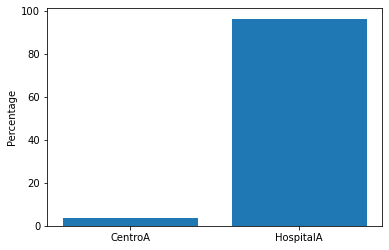

In [44]:
mytable = ds.groupby(['STD_WORK_LOCESP']).size()
n = mytable.sum()
mytable = (mytable/n)*100
barlist = ['CentroA', 'HospitalA']
plt.bar(barlist, mytable)
plt.ylabel('Percentage')

In [45]:
ds.groupby('STD_WORK_LOCESP').Activos.mean()


STD_WORK_LOCESP
CentroA      0.983683
HospitalA    0.984142
Name: Activos, dtype: float64

In [46]:
pd.crosstab(ds.Activos, ds.STD_WORK_LOCESP, margins=True) #1º la VD  target, 2º La predicción


STD_WORK_LOCESP,CentroA,HospitalA,All
Activos,,,
0,35,935,970
1,2110,58024,60134
All,2145,58959,61104


In [47]:
pd.crosstab(ds.Activos, ds.STD_WORK_LOCESP,normalize='columns', margins=True)*100    #Para que nos de en porcentajes


STD_WORK_LOCESP,CentroA,HospitalA,All
Activos,,,
0,1.631702,1.585848,1.587457
1,98.368298,98.414152,98.412543


In [48]:
my_ct = pd.crosstab(ds.Activos, ds.STD_WORK_LOCESP,normalize='columns', margins=True)*100  


In [49]:
my_ct=round(my_ct,1)


In [50]:
print(my_ct)


STD_WORK_LOCESP  CentroA  HospitalA   All
Activos                                  
0                    1.6        1.6   1.6
1                   98.4       98.4  98.4


In [51]:
##Stadistical test
ct = pd.crosstab(ds.Activos, ds.STD_WORK_LOCESP)
ct


STD_WORK_LOCESP,CentroA,HospitalA
Activos,,
0,35,935
1,2110,58024


In [52]:
stats.chi2_contingency(ct)


(0.006235988586514515,
 0.9370578564634043,
 1,
 array([[3.40509623e+01, 9.35949038e+02],
        [2.11094904e+03, 5.80230510e+04]]))

(array([0, 1, 2]),
 [Text(0, 0, 'CentroA'), Text(1, 0, 'HospitalA'), Text(2, 0, 'All')])

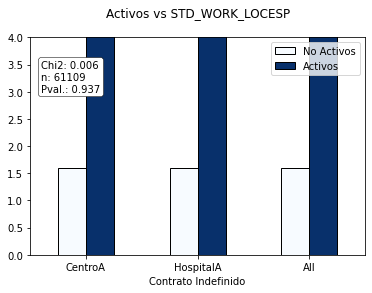

In [53]:
##Ploting the cross tabulation
my_ct2=my_ct.transpose() #Primero hay que treansponer la tabla para poder representarla graficamente


my_ct2.plot(kind="bar", edgecolor = "black", colormap='Blues') #Mapas de colores https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(-0.4, 3, 'Chi2: 0.006''\n''n: 61109' '\n' 'Pval.: 0.937', bbox=props)
plt.xlabel('Contrato Indefinido')
plt.title('Activos vs STD_WORK_LOCESP''\n')
plt.legend(['No Activos','Activos'])
plt.ylim(0,4)
plt.xticks(rotation='horizontal')

##Activos vs CSP_N_COLECTIVO

Variable Nominal: CSP_N_COLECTIVO

Text(0, 0.5, 'Percentage')

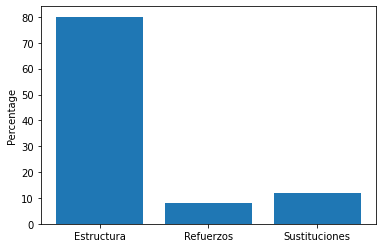

In [54]:
mytable = ds.groupby(['CSP_N_COLECTIVO']).size()
n = mytable.sum()
mytable = (mytable/n)*100
barlist = ['Estructura', 'Refuerzos', 'Sustituciones']
plt.bar(barlist, mytable)
plt.ylabel('Percentage')

In [55]:
ds.groupby('CSP_N_COLECTIVO').Activos.mean()


CSP_N_COLECTIVO
Estructura       0.980402
Refuerzos        0.998170
Sustituciones    0.999724
Name: Activos, dtype: float64

In [56]:
pd.crosstab(ds.Activos, ds.CSP_N_COLECTIVO, margins=True) #1º la VD  target, 2º La predicción

pd.crosstab(ds.Activos, ds.CSP_N_COLECTIVO,normalize='columns', margins=True)*100    #Para que nos de en porcentajes

my_ct = pd.crosstab(ds.Activos, ds.CSP_N_COLECTIVO,normalize='columns', margins=True)*100  

my_ct=round(my_ct,1)

print(my_ct)


CSP_N_COLECTIVO  Estructura  Refuerzos  Sustituciones   All
Activos                                                    
0                       2.0        0.2            0.0   1.6
1                      98.0       99.8          100.0  98.4


In [57]:
##Stadistical test
ct = pd.crosstab(ds.Activos, ds.CSP_N_COLECTIVO)
ct

stats.chi2_contingency(ct)

(218.46589210406725,
 3.6369245173058915e-48,
 2,
 array([[  776.80642838,    78.07115737,   115.12241424],
        [48157.19357162,  4839.92884263,  7136.87758576]]))

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Estructura'),
  Text(1, 0, 'Refuerzos'),
  Text(2, 0, 'Sustituciones'),
  Text(3, 0, 'All')])

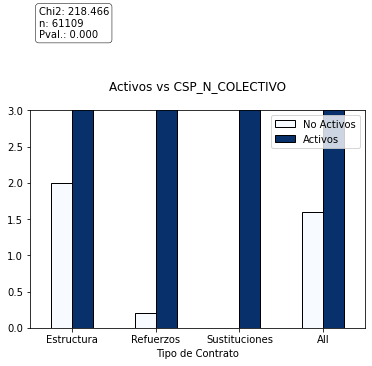

In [58]:
##Ploting the cross tabulation
my_ct2=my_ct.transpose() #Primero hay que treansponer la tabla para poder representarla graficamente


my_ct2.plot(kind="bar", edgecolor = "black", colormap='Blues') 
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(-0.4, 4, 'Chi2: 218.466''\n''n: 61109' '\n' 'Pval.: 0.000', bbox=props)
plt.xlabel('Tipo de Contrato')
plt.title('Activos vs CSP_N_COLECTIVO''\n')
plt.legend(['No Activos','Activos'])
plt.ylim(0,3)
plt.xticks(rotation='horizontal')

## Activos vs Num_Periodo

Num. Periodo

In [59]:
ds.Num_Periodo.describe()
plt.hist(ds.Num_Periodo)

AttributeError: 'DataFrame' object has no attribute 'Num_Periodo'

In [63]:
###Descrive comparison
ds.groupby('Activos').Num_Periodo.mean()

Activos
0    1.932990
1    1.874613
Name: Num_Periodo, dtype: float64

In [64]:
#Stadistical comparison:
activo_s = ds.loc[ds.Activos==1, "Num_Periodo"]  
activo_n = ds.loc[ds.Activos==0, "Num_Periodo"]


In [65]:
##Perform a t test for mean comparison
import scipy.stats as stats

stats.ttest_ind(activo_s, activo_n, equal_var = False)


res = stats.ttest_ind(activo_s, activo_n, equal_var = False)
res
print(res[1]) 

0.07947004075736888


Text(0.5, 1.0, 'Activos vs Num_Periodo\n')

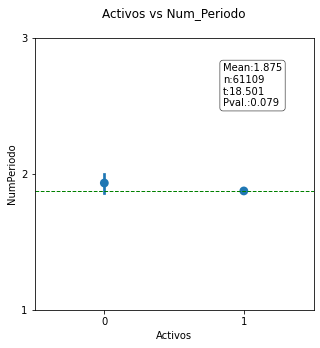

In [66]:
#pointplot
plt.figure(figsize=(5,5))
ax = sns.pointplot(x="Activos", y="Num_Periodo", data=ds,ci=95, join=0)

#ajustar eje eje y
plt.yticks(np.arange(0, 4, step=1))
plt.ylim(1,3)                                                            #Limite

#Pintar linea en la media
plt.axhline(y=ds.Num_Periodo.mean(),
linewidth=1, linestyle= 'dashed', color="green")

#Caja de texto
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(0.85,2.5,'Mean:1.875''\n''n:61109' '\n' 't:18.501' '\n' 'Pval.:0.079', bbox=props)

#Texto ejes
plt.xlabel('Activos')
plt.ylabel('NumPeriodo')
plt.title('Activos vs Num_Periodo''\n')



## Activos vs edad

(array([  377.,  4946., 10615., 16140., 14594.,  7887.,  3754.,  1695.,
          921.,   175.]),
 array([19., 24., 29., 34., 39., 44., 49., 54., 59., 64., 69.]),
 <BarContainer object of 10 artists>)

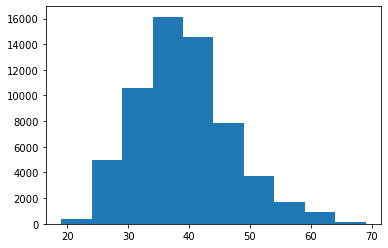

In [67]:
#Num. Periodo

ds.Edad.describe()
plt.hist(ds.Edad)

In [68]:
###Descrive comparison
ds.groupby('Activos').Edad.mean()

Activos
0    39.724742
1    38.654438
Name: Edad, dtype: float64

In [69]:
#Stadistical comparison:
activo_s = ds.loc[ds.Activos==1, "Edad"]  
activo_n = ds.loc[ds.Activos==0, "Edad"]

In [70]:
##Perform a t test for mean comparison
import scipy.stats as stats

stats.ttest_ind(activo_s, activo_n, equal_var = False)


res = stats.ttest_ind(activo_s, activo_n, equal_var = False)
res
print(res[1])  

2.2425381828508305e-17


Text(0.5, 1.0, 'Activos vs edad\n')

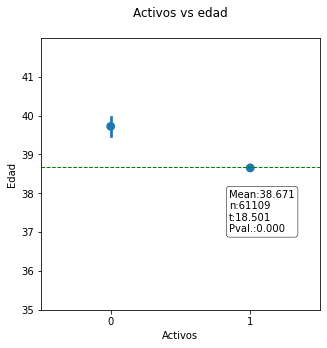

In [71]:
#Graficar

#pointplot
plt.figure(figsize=(5,5))
ax = sns.pointplot(x="Activos", y="Edad", data=ds,ci=95, join=0)

#ajustar eje eje y
plt.yticks(np.arange(35, 42, step=1))
plt.ylim(35,42)                                                            #Limite

#Pintar linea en la media
plt.axhline(y=ds.Edad.mean(),
linewidth=1, linestyle= 'dashed', color="green")

#Caja de texto
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(0.85,37,'Mean:38.671''\n''n:61109' '\n' 't:18.501' '\n' 'Pval.:0.000', bbox=props)

#Texto ejes
plt.xlabel('Activos')
plt.ylabel('Edad')
plt.title('Activos vs edad''\n')

## Activos vs STD_N_GENDERESP

Text(0, 0.5, 'Percentage')

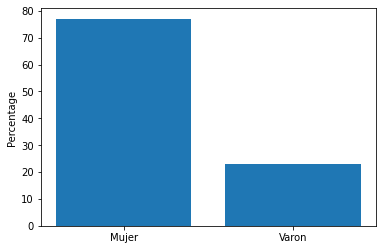

In [72]:
# Variable Nominal: STD_N_GENDERESP

mytable = ds.groupby(['STD_N_GENDERESP']).size()
n = mytable.sum()
mytable = (mytable/n)*100
barlist = ['Mujer', 'Varon']
plt.bar(barlist, mytable)
plt.ylabel('Percentage')

In [73]:
ds.groupby('STD_N_GENDERESP').Activos.mean()

STD_N_GENDERESP
Mujer    0.981202
Varón    0.993939
Name: Activos, dtype: float64

In [74]:
#Nominal vs Nominal

pd.crosstab(ds.Activos, ds.STD_N_GENDERESP, margins=True) #1º la VD  target, 2º La predicción


STD_N_GENDERESP,Mujer,Varón,All
Activos,,,
0,885,85,970
1,46195,13939,60134
All,47080,14024,61104


In [75]:
pd.crosstab(ds.Activos, ds.STD_N_GENDERESP,normalize='columns', margins=True)*100    #Para que nos de en porcentajes


STD_N_GENDERESP,Mujer,Varón,All
Activos,,,
0,1.879779,0.606104,1.587457
1,98.120221,99.393896,98.412543


In [76]:
my_ct = pd.crosstab(ds.Activos, ds.STD_N_GENDERESP,normalize='columns', margins=True)*100  


In [77]:
my_ct=round(my_ct,1)


In [78]:
print(my_ct)


STD_N_GENDERESP  Mujer  Varón   All
Activos                            
0                  1.9    0.6   1.6
1                 98.1   99.4  98.4


In [79]:
##Stadistical test
ct = pd.crosstab(ds.Activos, ds.STD_N_GENDERESP)
ct

stats.chi2_contingency(ct)

(111.38897992753739,
 4.862887756948592e-26,
 1,
 array([[  747.37496727,   222.62503273],
        [46332.62503273, 13801.37496727]]))

(array([0, 1, 2]),
 [Text(0, 0, 'Mujer'), Text(1, 0, 'Varón'), Text(2, 0, 'All')])

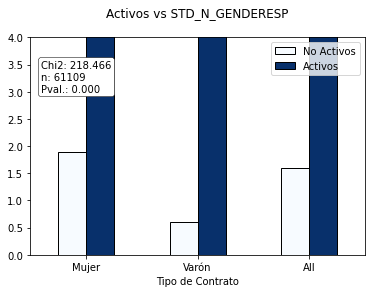

In [80]:
##Ploting the cross tabulation
my_ct2=my_ct.transpose() #Primero hay que treansponer la tabla para poder representarla graficamente


my_ct2.plot(kind="bar", edgecolor = "black", colormap='Blues') #Mapas de colores https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(-0.4, 3, 'Chi2: 218.466''\n''n: 61109' '\n' 'Pval.: 0.000', bbox=props)
plt.xlabel('Tipo de Contrato')
plt.title('Activos vs STD_N_GENDERESP''\n')
plt.legend(['No Activos','Activos'])
plt.ylim(0,4)
plt.xticks(rotation='horizontal')


#Analisis de frecuencias
Nos centramos en las filas en las que la variable 'Activos' es igual a 0.

In [81]:
ds2 = ds[ds['Activos']==0]

In [82]:
ds2

,NM_ORGANIZATIONESP,STD_N_HR_TYPEESP,Anyo,AnyoMes,STD_ID_PERSON,STD_N_GENDERESP,Num_Periodo,SSP_ID_CONT_INTERN,SSP_NM_CONT_INESP,Fecha Inicio,...,STD_N_WL_TYPEESP,STD_WORK_LOCESP,CSP_N_COLECTIVO,STD_DT_BIRTH,Edad,RangoEdad,Nacionalidad,SSP_ID_MINUSVALIA,Nombre de la minusvalia : Span,Activos
15449,Hospital de TORREJON,Empleado,2019,201906,1007232,Mujer,2,189,INDEFINIDO TP COMPL TRANSF DE TEMPO,03/10/2014,...,Atención Especializada,HospitalA,Estructura,16/08/1989,34,25-40,Española,-2,Sin Valor,0
16199,Hospital de TORREJON,Empleado,2019,201907,1003914,Mujer,2,100,ORDINARIO INDEFINIDO TP COMPLETO,12/09/2011,...,Atención Especializada,HospitalA,Estructura,06/04/1978,45,41-50,Española,-2,Sin Valor,0
16224,Hospital de TORREJON,Empleado,2019,201907,1004038,Mujer,3,100,ORDINARIO INDEFINIDO TP COMPLETO,21/07/2018,...,Atención Especializada,HospitalA,Estructura,28/03/1972,51,Más de 50,Española,-2,Sin Valor,0
16346,Hospital de TORREJON,Empleado,2019,201907,1004433,Mujer,3,100,ORDINARIO INDEFINIDO TP COMPLETO,13/05/2019,...,Atención Especializada,HospitalA,Estructura,10/06/1985,38,25-40,Española,-2,Sin Valor,0
16348,Hospital de TORREJON,Empleado,2019,201907,1004441,Mujer,2,100,ORDINARIO INDEFINIDO TP COMPLETO,15/01/2019,...,Atención Especializada,HospitalA,Estructura,24/10/1985,38,25-40,Española,-2,Sin Valor,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60505,Hospital de TORREJON,Empleado,2022,202207,1015544,Mujer,1,189,INDEFINIDO TP COMPL TRANSF DE TEMPO,20/06/2018,...,Atención Especializada,HospitalA,Estructura,06/11/1984,39,25-40,Española,-2,Sin Valor,0
60509,Hospital de TORREJON,Empleado,2022,202207,1015549,Mujer,2,189,INDEFINIDO TP COMPL TRANSF DE TEMPO,29/10/2020,...,Atención Especializada,HospitalA,Estructura,04/09/1982,41,41-50,Dominicano,-2,Sin Valor,0
60602,Hospital de TORREJON,Empleado,2022,202207,1015758,Mujer,1,189,INDEFINIDO TP COMPL TRANSF DE TEMPO,01/04/2019,...,Atención Especializada,HospitalA,Estructura,09/10/1986,37,25-40,Española,-2,Sin Valor,0
60668,Hospital de TORREJON,Empleado,2022,202207,1016618,Mujer,1,189,INDEFINIDO TP COMPL TRANSF DE TEMPO,23/09/2019,...,Atención Especializada,HospitalA,Estructura,15/09/1990,33,25-40,Española,-2,Sin Valor,0


## SSP_NO_DEFINIDO

Text(0, 0.5, 'Percentage')

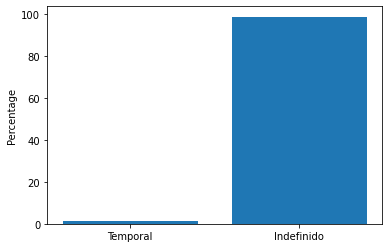

In [84]:
#Variable Nominal: SSP_NO_DEFINIDO
mytable = ds2.groupby(['SSP_NO_DEFINIDO']).size()
n = mytable.sum()
mytable = (mytable/n)*100
barlist = ['Temporal', 'Indefinido']
plt.bar(barlist, mytable)
plt.ylabel('Percentage')

In [85]:
pd.crosstab(ds.Activos, ds2.SSP_NO_DEFINIDO, margins=True) #1º la VD  target, 2º La predicción

pd.crosstab(ds.Activos, ds2.SSP_NO_DEFINIDO,normalize='columns', margins=True)*100    #Para que nos de en porcentajes

my_ct = pd.crosstab(ds2.Activos, ds2.SSP_NO_DEFINIDO,normalize='columns', margins=True)*100  

my_ct=round(my_ct,1)

print(my_ct)

SSP_NO_DEFINIDO      N      S    All
Activos                             
0                100.0  100.0  100.0


In [86]:
#Stadistical test
ct = pd.crosstab(ds.Activos, ds.SSP_NO_DEFINIDO)
ct

stats.chi2_contingency(ct)

(270.2271557599875,
 1.0125155947699297e-60,
 1,
 array([[  226.30793401,   743.69206599],
        [14029.69206599, 46104.30793401]]))

pvalue = 0.000

<AxesSubplot:>

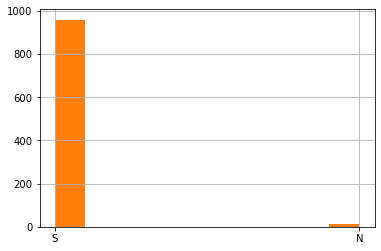

In [87]:
#histograma
plt.hist(ds2.SSP_NO_DEFINIDO)
ds2.SSP_NO_DEFINIDO.hist() 

## CSP_N_AG_CATEGOR

<AxesSubplot:>

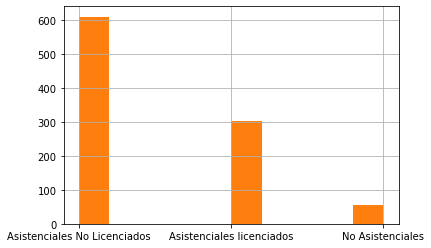

In [88]:
#histograma
plt.hist(ds2.CSP_N_AG_CATEGOR)
ds2.CSP_N_AG_CATEGOR.hist() 

Text(0, 0.5, 'Percentage')

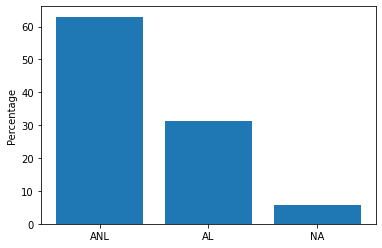

In [89]:
## Variable Nominal: CSP_N_AG_CATEGOR


mytable = ds2.groupby(['CSP_N_AG_CATEGOR']).size()
n = mytable.sum()
mytable = (mytable/n)*100
barlist = ['ANL', 'AL', 'NA']
plt.bar(barlist, mytable)
plt.ylabel('Percentage')